# Quel est le temps moyen passé aux pit-stops par année ?

## Code 

* Question traitée avec pandas

In [ ]:
import pandas as pd

pit_stops = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/pit_stops.csv')
races = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/races.csv')

jointure = pd.merge(pit_stops, races, on='raceId', how='left')

circuit = 'Monte-Carlo'
temps_moyen_pit_stops = jointure.groupby('year')['milliseconds'][circuit].mean()
temps_moyen_pit_stops

year
2011     24448.849192
2012     23283.769556
2013     24121.318612
2014     55088.632353
2015     25500.213225
2016    124357.194135
2017     56789.619597
2018     24674.283582
2019     24938.538462
2020    160940.321549
2021    219750.268170
2022    122574.485714
2023    178927.768640
2024    172959.378378
Name: milliseconds, dtype: float64

On convertit nos millisecondes en minutes:secondes.centiemes

In [28]:
def convert_to_human_readable(milliseconds):
    minutes = milliseconds // 60000
    seconds = (milliseconds % 60000) // 1000
    return f"{minutes}m {seconds}s"

temps_moyen_pit_stops_readable = temps_moyen_pit_stops.map(convert_to_human_readable)
temps_moyen_pit_stops_readable

year
2011    0.0m 24.0s
2012    0.0m 23.0s
2013    0.0m 24.0s
2014    0.0m 55.0s
2015    0.0m 25.0s
2016     2.0m 4.0s
2017    0.0m 56.0s
2018    0.0m 24.0s
2019    0.0m 24.0s
2020    2.0m 40.0s
2021    3.0m 39.0s
2022     2.0m 2.0s
2023    2.0m 58.0s
2024    2.0m 52.0s
Name: milliseconds, dtype: object

## Graphique

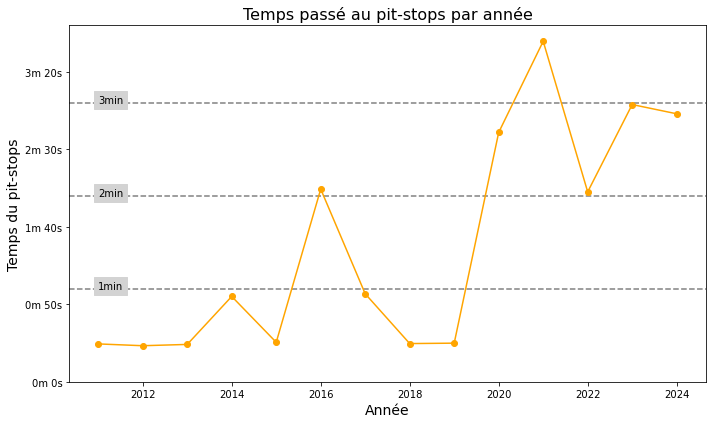

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def human_readable_formatter(x,pos):
    return convert_to_human_readable(int(x))

plt.figure(figsize=(10, 6))
plt.axhline(y=60000, color='gray', linestyle='--')
plt.axhline(y=120000, color='gray', linestyle='--')
plt.axhline(y=180000, color='gray', linestyle='--')
plt.text(2011, 60000, '1min', backgroundcolor='lightgrey')
plt.text(2011, 120000, '2min', backgroundcolor='lightgrey')
plt.text(2011, 180000, '3min', backgroundcolor='lightgrey')
temps_moyen_pit_stops.plot(
    x='year',
    y='milliseconds',
    marker="o",
    ylim=(0, 230000),
    color='orange'
)
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_formatter))
plt.title('Temps passé au pit-stops par année', fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Temps du pit-stops", fontsize=14)
plt.tight_layout()